# Random forest ocupados

In [67]:
import pandas as pd 
import numpy as np
import seaborn as sns
import math

In [41]:
pd.set_option('display.max.columns',None)
pd.set_option('display.max.rows',None)


In [42]:
base=pd.read_csv('base de datos machine learning.csv', sep=';',encoding='932')

In [43]:
base.head()

,DIRECTORIO,AREA,ocupados,sexo,estudia,edad,educaci
0,4903659.0,5.0,1.0,0,0.0,38,6.0
1,4903659.0,5.0,1.0,1,1.0,47,6.0
2,4903660.0,5.0,0.0,1,0.0,79,6.0
3,4903660.0,5.0,0.0,0,0.0,67,5.0
4,4903660.0,5.0,1.0,0,0.0,42,6.0


In [44]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30485 entries, 0 to 30484
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DIRECTORIO  25580 non-null  float64
 1   AREA        25580 non-null  float64
 2   ocupados    25580 non-null  float64
 3   sexo        30485 non-null  int64  
 4   estudia     29417 non-null  float64
 5   edad        30485 non-null  int64  
 6   educaci    29417 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 1.6 MB


In [45]:
base=base.dropna()

In [46]:
base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24678 entries, 0 to 25579
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DIRECTORIO  24678 non-null  float64
 1   AREA        24678 non-null  float64
 2   ocupados    24678 non-null  float64
 3   sexo        24678 non-null  int64  
 4   estudia     24678 non-null  float64
 5   edad        24678 non-null  int64  
 6   educaci    24678 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 1.5 MB


Modelo de clasificación.
Como variable dependiente tendremos si las personas están ocupadas o no, para eso utilizamos la variable de la gran encuesta de hogares del DANE, asimismo esa variable tiene como pregunta central de a que se dedicó la persona en la última semana, teniendo como varias opciones como trabajar, estudiar oficios del hogar entre otros, ahora bien, le hicimos un tratamiento para que tomara el valor de uno si su respuesta era igual a trabajar y para las demás opciones un valor de 0.
Como variables independientes tomamos algunas características de las personas encuestadas como lo son sexo, edad, estudia y educación. A continuación, se dará una explicación un poco más detallada:
Sexo: esta variable es muy importante ya que es una característica que nos muestra cual es la incidencia de ser mujer en estar ocupado o desocupado en la vida laboral, tenemos 30,485 observaciones de las cuales tenemos 16,180 mujeres y 14,305 hombres.
Edad: La edad también es una variable muy importante para determinar ya que a muy temprana edad es muy factible de que se encuentre desocupados, en esta variable nos encontramos con 30,485 observaciones con un max de 103 años y una media 34,69 y una desviación estándar de 21,50.
Educación: ¿cuál es el título o diploma de mayor nivel educativo que usted ha recibido?, esta variable nos muestra cual es el estudio que mayor alcanzado, para saber cómo incide el mayor titulo en si la persona ocupada o desocupada, para esta variable solo tenemos 29,417 observaciones, con una mayor frecuencia en post grado y bachiller.
Estudia: Esta variable nos muestra si la persona está estudiando una carrera en el momento o no, con 29,417 observaciones con 21,469 no, y con 7,948 con que si estudia. Esta variable es importante para saber si el estudiar genera impacto en el de trabajar o no.



In [64]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, max_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.datasets import make_regression, make_classification

<AxesSubplot:xlabel='AREA', ylabel='Count'>

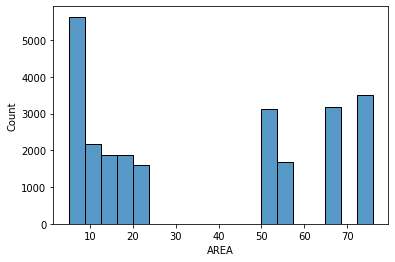

In [48]:
sns.histplot(data=base,x='AREA')

<AxesSubplot:xlabel='ocupados', ylabel='Count'>

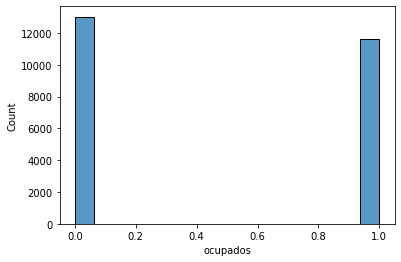

In [49]:
sns.histplot(data=base,x='ocupados')

<AxesSubplot:xlabel='sexo', ylabel='Count'>

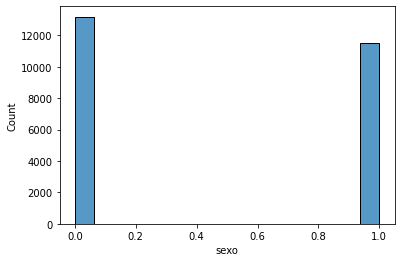

In [34]:
sns.histplot(data=base,x='sexo')

<AxesSubplot:xlabel='estudia', ylabel='Count'>

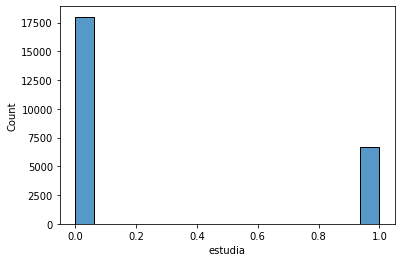

In [35]:
sns.histplot(data=base,x='estudia')

<AxesSubplot:xlabel='educaci\ue262', ylabel='Count'>

C:\Users\Ryzen 5\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 57954 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Ryzen 5\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 57954 missing from current font.
  font.set_text(s, 0, flags=flags)


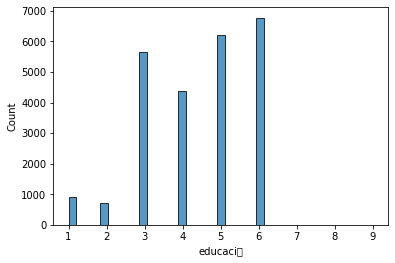

In [36]:
sns.histplot(data=base,x='educaci')

In [50]:
X = base.filter(['sexo','estudia','edad','educaci'])
y = base.pop('ocupados')

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [53]:
reg_tree = DecisionTreeRegressor(max_depth=4)
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

In [54]:
y_pred = reg_tree.predict(X_test)
y_fit_train = reg_tree.predict(X_train)

In [55]:
def metricas(y_true, y_pred):
  print(f'MSE: {mean_squared_error(y_true, y_pred)}')
  print(f'MAE: {mean_absolute_error(y_true, y_pred)}')
  print(f'RMSE: {np.sqrt(mean_squared_error(y_true,y_pred))}')

In [56]:
print('Métricas del entrenamiento',end='\n')
print('---'*10)
metricas(y_train, y_fit_train)
print('---'*10)
print('Métricas del testeo')
print('---'*10)
metricas(y_test, y_pred)

Métricas del entrenamiento
------------------------------
MSE: 0.2486887668826478
MAE: 0.4973775337652955
RMSE: 0.49868704302663386
------------------------------
Métricas del testeo
------------------------------
MSE: 0.24970263566082446
MAE: 0.4983808378455426
RMSE: 0.4997025471826459


[Text(202.275, 195.696, 'X[2] <= 91.5\nmse = 0.249\nsamples = 19742\nvalue = 0.47'),
 Text(111.60000000000001, 152.208, 'X[2] <= 86.5\nmse = 0.249\nsamples = 19699\nvalue = 0.47'),
 Text(55.800000000000004, 108.72, 'X[2] <= 52.5\nmse = 0.249\nsamples = 19587\nvalue = 0.471'),
 Text(27.900000000000002, 65.232, 'X[0] <= 0.5\nmse = 0.249\nsamples = 14926\nvalue = 0.466'),
 Text(13.950000000000001, 21.744, 'mse = 0.248\nsamples = 7808\nvalue = 0.459'),
 Text(41.85, 21.744, 'mse = 0.249\nsamples = 7118\nvalue = 0.474'),
 Text(83.7, 65.232, 'X[2] <= 54.5\nmse = 0.25\nsamples = 4661\nvalue = 0.484'),
 Text(69.75, 21.744, 'mse = 0.249\nsamples = 516\nvalue = 0.525'),
 Text(97.65, 21.744, 'mse = 0.25\nsamples = 4145\nvalue = 0.479'),
 Text(167.4, 108.72, 'X[0] <= 0.5\nmse = 0.234\nsamples = 112\nvalue = 0.375'),
 Text(139.5, 65.232, 'X[2] <= 90.5\nmse = 0.245\nsamples = 70\nvalue = 0.429'),
 Text(125.55000000000001, 21.744, 'mse = 0.238\nsamples = 54\nvalue = 0.389'),
 Text(153.45000000000002, 

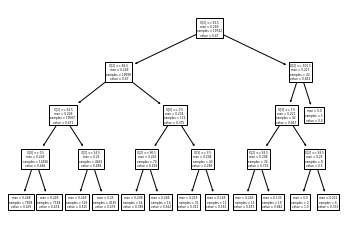

In [57]:
from sklearn import tree

tree.plot_tree(reg_tree)

In [61]:
clsr = DecisionTreeClassifier(max_depth=4)
clsr.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [65]:
prof = [2,3,4,5]
n_est = [10,20,30,50,100]

for i in prof:
  for j in n_est:
    rf_reg = RandomForestRegressor(max_depth=i, n_estimators=j)
    rf_reg.fit(X_train, y_train)
    y_fit_train = rf_reg.predict(X_train)
    y_pred = rf_reg.predict(X_test)
    print(f'max_depth = {i}, n_estimators = {j}')
    print('---'*10)
    print('Métricas del entrenamiento',end='\n')
    print('---'*10)
    metricas(y_train, y_fit_train)
    print('---'*10)
    print('Métricas del testeo')
    print('---'*10)
    metricas(y_test, y_pred)

max_depth = 2, n_estimators = 10
------------------------------
Métricas del entrenamiento
------------------------------
MSE: 0.24885959279684888
MAE: 0.49785492787818986
RMSE: 0.49885828929351156
------------------------------
Métricas del testeo
------------------------------
MSE: 0.249477987537651
MAE: 0.4984723737511538
RMSE: 0.4994777147557747
max_depth = 2, n_estimators = 20
------------------------------
Métricas del entrenamiento
------------------------------
MSE: 0.2488402869201157
MAE: 0.4978372507705636
RMSE: 0.49883893885713826
------------------------------
Métricas del testeo
------------------------------
MSE: 0.24951868780083794
MAE: 0.4985194983438569
RMSE: 0.49951845591613325
max_depth = 2, n_estimators = 30
------------------------------
Métricas del entrenamiento
------------------------------
MSE: 0.24885337194740684
MAE: 0.4978525020637332
RMSE: 0.4988520541677731
------------------------------
Métricas del testeo
------------------------------
MSE: 0.2495195136